![BDAA_Logo.png](attachment:BDAA_Logo.png)

# <center>Intro to Web Scraping - Topic I _Exercises_</center>

Time to get your hands dirty!

Here's a (dumb) question I have:

<center><h3>_**How exactly does the number of miles I drive with my vehicle affect its value, if I were to sell it?**_</h3></center>

At a basic level, the answer is obviously intuitive. Generally, the more you use something, the less valuable it will be. So, the more I drive my vehicle (the more the odometer reading increases), the less I could get for it on a site like, say, Autotrader. But just how much less valuable will it be, per mile? Is the relationship between odometer reading and value linear? Let's find out!

[Cars.com](www.cars.com) is the most frequently used website to buy/sell used vehicles, so for our purposes, this will be the best site to get some quick 'vehicle depreciation' data.

I own a 2014 Volkswagen Passat 2.5L SE. I call her 'the boat', so that does mean that I am indeed a boat captain. And while I love being a boat captain, sometimes I wish I could trade her in for something lighter, sportier, and generally faster. However, it serves me well, and I would not be wise to try to buy a new vehicle in college. There's plenty of other 2014 Volkswagen Passats out there, so I could probably generate a 'depreciation' model from Cars.com data specific to my make/model of vehicle. 
<br/>
![2014-vw-passat-sedan.jpg](attachment:2014-vw-passat-sedan.jpg)
<br/>

Let's take a look at [Used 2014 VW Passat 2.5L SE listings](https://www.cars.com/for-sale/searchresults.action/?localVehicles=true&mdId=21758&mkId=20089&page=1&perPage=100&rd=99999&searchSource=GN_REFINEMENT&showMore=true&sort=relevance&stkTypId=28881&yrId=51683&zc=43201) on Cars.com. We'll use this first page of ~100 results to generate our depreciation model. There's a good variety of listings on this page, and we can assume that this is a random sample of VW Passats in the market (condition, color, trim, etc). From each listing 'container', we will need the following (at minimum):
1. Odometer reading
2. Price

Sounds simple enough! 
<br/>
<center>_More than half the battle in web scraping is getting our heads wrapped around the way web developers decide to structure html elements._</center>
<br/>

First of all, let's load in all the modules we'll need.

In [0]:
# What modules do you think we'll need, based on our practice?
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

Sweet - now let's set up our _BeautifulSoup_ object to read the html.

In [0]:
# Link to Cars.com 2015 VW Passat listings
link = 'https://www.cars.com/for-sale/searchresults.action/?localVehicles=true&mdId=21758&mkId=20089&page=1&perPage=100&prMn=2000&prMx=100000&rd=99999&searchSource=GN_REFINEMENT&showMore=true&sort=relevance&stkTypId=28881&trId=54415&yrId=51683&zc=43201'
# Open the link
page = requests.get(link, headers={'User-Agent':'Mozilla/5.0'})
# Create a BeautifulSoup object that parses the listings
listings = BeautifulSoup(page.content, 'html.parser')

Now we're ready to start scraping odometer readings and corresponding prices!

In [0]:
# By what element can we identify individual listings? Create a list that contains all of the listings on the page.
# Hint: The list should have length 100.
listing_info = listings.select('.listing-row__link')
# Look at the first element of the list you've created. How can we drill down deeper into the html to get 1) odometer reading and 2) price?
prices = []
odometers = []
# Loop through your list of listings..
for listing in listing_info:
    # Define a variable that contains the text of the html element that contains the listing price.
    price = listing.select('.listing-row__price')[0].text
    # Apply any needed transformations to make sure that the price text is in the form of an integer.
    # (i.e. '  $8,993  ' should be transformed to '8993')
    # Hint: The strip() and replace() functions will be of use.
    price = price.strip().replace('$', '').replace(',', '')
    # Append() the listing price to our list of prices.
    prices.append(price)
    # Define a variable that contains the text of the html element that contains the listing odometer reading.
    odometer = listing.select('.listing-row__mileage')[0].text
    # Apply any needed transformations to make sure that the odometer string text is in the form of a float.
    odometer = odometer.strip().replace(' mi.', '').replace(',','')
    # Append() the listing odometer reading to our list of odometer readings.
    odometers.append(odometer)

# Use a list comprehension statement to convert all strings in both lists to integers and floats, respectively.
prices = [int(p) for p in prices]
odometers = [float(o) for o in odometers]

Given that we have a list of values for our dependent and independent variables, we're ready to do some quick and dirty visualization and analysis.

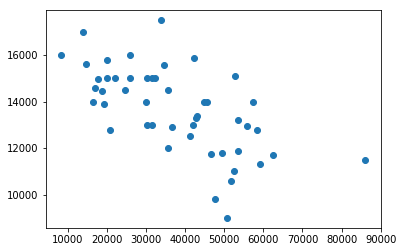

In [0]:
# Use the plt.scatter() function to quickly display a graph of odometer reading versus listing price.
plt.scatter(odometers,prices)
plt.show()

Let's run a quick linear regression on our data so that we can see just how much value our vehicle might be losing per mile driven.

In [0]:
# Quick linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(odometers,prices)
# Print the results
print('Based on our (sparse) data, a 2014 Volkswagen Passat 2.5L SE depreciates at a rate of', round(slope*-100, 1), 'cents for every mile driven.')

Based on our (sparse) data, a 2014 Volkswagen Passat 2.5L SE depreciates at a rate of 7.2 cents for every mile driven.
